# Pymaceuticals Inc.
---

### Analysis


The 2 drugs that had the highest count total were Capomulin and Ramicane. Propriva had the lowest drug count out of all 10 drugs used on the mice. 

In terms of each drug that was used on the mice, the drug where the data was closest to the mean was Ramicane. The drug that had the highest standard deviation and was furthest away from the mean and more spread out was Ketapril.


Capumolin drug vs. mice analysis

The correlation coefficient is 0.53, stating that it has somewhat of a positive correlation between the weight of the mouse and tumor volume. This means that the heavier the mouse, the greater the tumor volume inside
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

Study_Summary = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how="outer")

# Display the data table for preview
Study_Summary.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mouse_number = Study_Summary["Mouse ID"].nunique()

mouse_number

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = Study_Summary.loc[Study_Summary.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

duplicate_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
Study_Summary.loc[Study_Summary["Mouse ID"]=="g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = Study_Summary[Study_Summary["Mouse ID"].isin(duplicate_id)==False]

cleaned_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 


avg_drug_mean = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
avg_drug_mean

std_drug = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
std_drug

var_drug = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
var_drug

median_drug = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
median_drug


# mean, median, variance, standard deviation, and SEM of the tumor volume. 


sem_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
sem_tumor


# SEM (STANDARD ERROR METHOD) From .describe() - use mean, sq. root of number of samples 




# Assemble the resulting series into a single summary DataFrame.


Stats_Model = pd.DataFrame({"Average":avg_drug_mean,
                           "St. Deviation":std_drug,
                           "Variance":var_drug,
                           "Median":median_drug,
                           "Standard Error":sem_tumor})

Stats_Model


,Average,St. Deviation,Variance,Median,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,4.994774,24.947764,41.557809,0.329346
Ceftamin,52.591172,6.268188,39.290177,51.776157,0.469821
Infubinol,52.884795,6.567243,43.128684,51.820584,0.492236
Ketapril,55.235638,8.279709,68.553577,53.698743,0.603860
Naftisol,54.331565,8.134708,66.173479,52.509285,0.596466
Placebo,54.033581,7.821003,61.168083,52.288934,0.581331
Propriva,52.320930,6.622085,43.852013,50.446266,0.544332
Ramicane,40.216745,4.846308,23.486704,40.673236,0.320955
Stelasyn,54.233149,7.710419,59.450562,52.431737,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

Summary_Table = cleaned_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})

Summary_Table


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
drug_count = cleaned_data["Drug Regimen"].value_counts()

drug_count


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

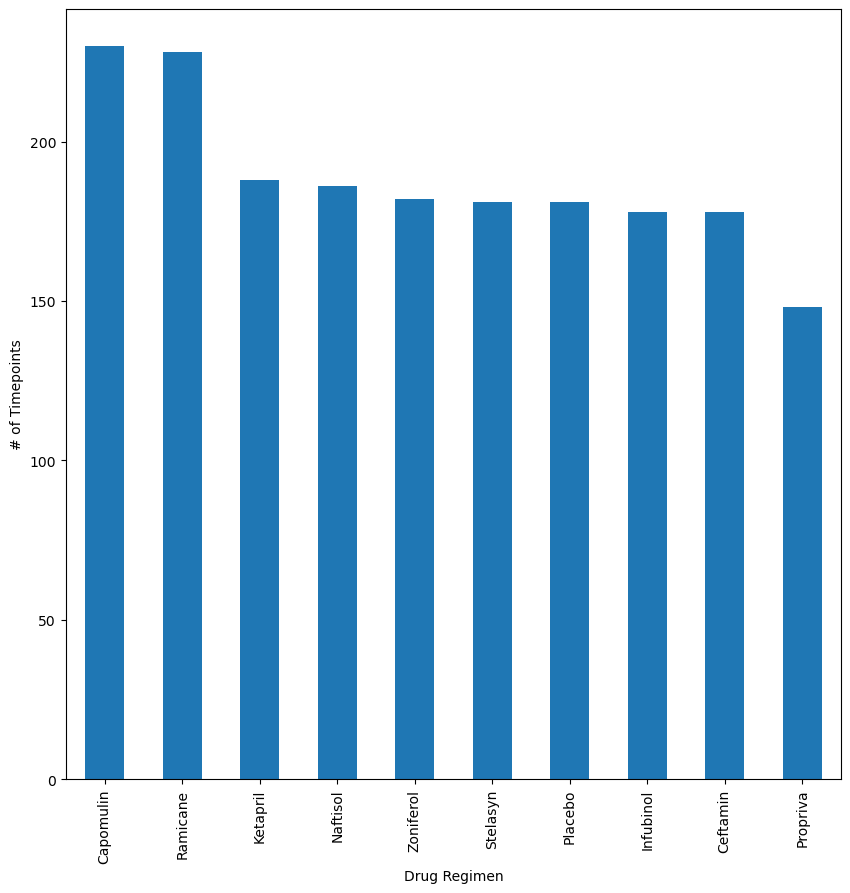

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_count.plot(kind = "bar", figsize=(10,10), xlabel = "Drug Regimen", ylabel = "# of Timepoints") 

plt.xticks(rotation ="vertical")

plt.show()

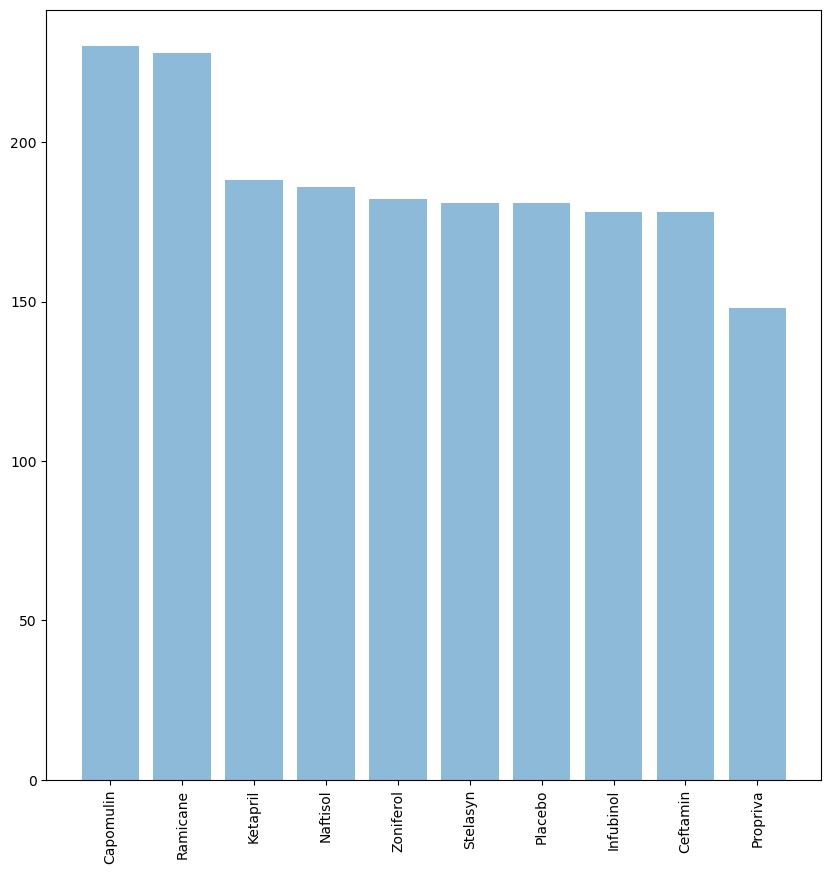

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10,10))

plt.bar(drug_count.index.values, drug_count.values, alpha=0.5, align="center")
plt.xticks(rotation="vertical")

plt.show()

In [12]:
# Gender count between Male and Female 

gender_count = cleaned_data["Sex"].value_counts()

gender_count


Male      958
Female    922
Name: Sex, dtype: int64

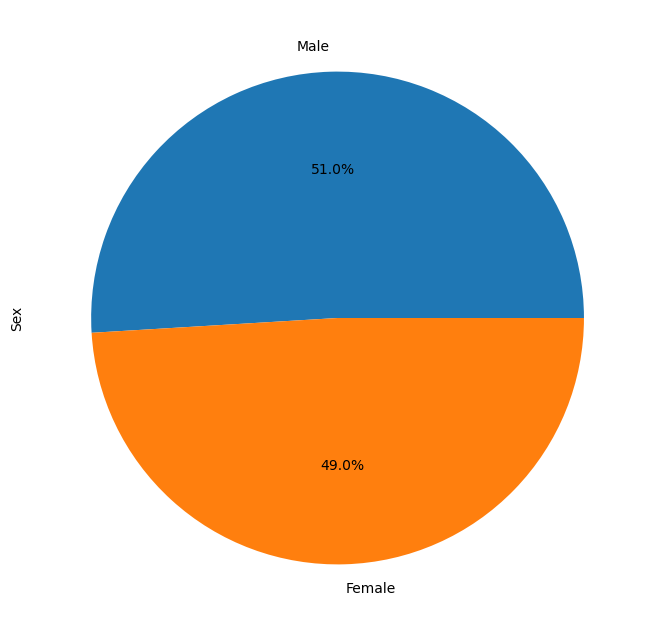

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

plt.title = ("Female vs. Male Mice")
explode = [0,0]

gender_count.plot.pie(figsize=(8,8), explode=explode, autopct="%1.1f%%")

plt.show()

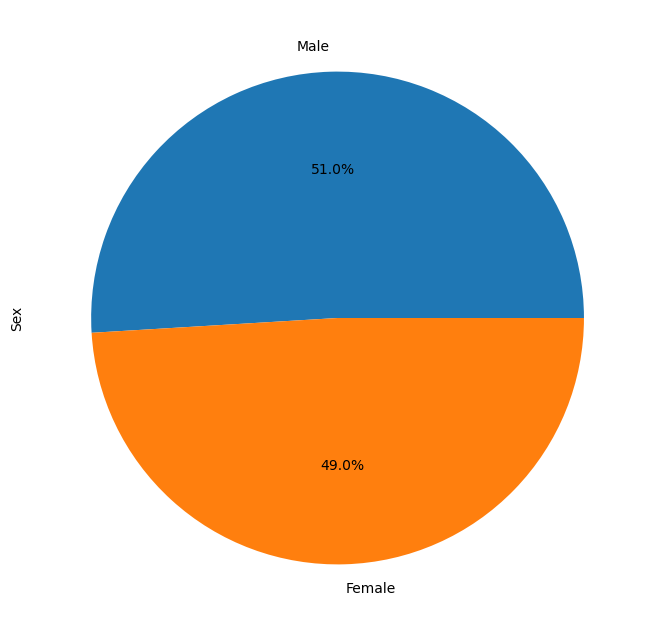

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure(figsize=(8,8))
plt.pie(gender_count.values, autopct="%1.1f%%", labels = gender_count.index.values)
plt.ylabel("Sex")

plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

final_timepoint = cleaned_data.groupby(["Mouse ID"])["Timepoint"].max()
final_timepoint = final_timepoint.reset_index()



# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_timepoint = final_timepoint.merge(cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

final_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [16]:
final_timepoint[["Drug Regimen", "Tumor Volume (mm3)"]].describe()

,Tumor Volume (mm3)
count,248.000000
mean,54.968606
std,12.671479
min,22.050126
25%,45.875867
50%,55.793278
75%,65.053624
max,78.567014


In [17]:
top_drugs = final_timepoint[["Mouse ID", "Tumor Volume (mm3)", "Drug Regimen"]]

top_drugs

,Mouse ID,Tumor Volume (mm3),Drug Regimen
0,a203,67.973419,Infubinol
1,a251,65.525743,Infubinol
2,a262,70.717621,Placebo
3,a275,62.999356,Ceftamin
4,a366,63.440686,Stelasyn
...,...,...,...
243,z435,48.710661,Propriva
244,z578,30.638696,Ramicane
245,z581,62.754451,Infubinol
246,z795,65.741070,Naftisol


In [18]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_treatments



# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for regiment in drug_treatments:
    
# Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_timepoint.loc[final_timepoint["Drug Regimen"] == regiment, "Tumor Volume (mm3)"]

# add subset 
    tumor_vol_data.append(final_tumor_vol)
    
   
    

    
# Determine outliers using upper and lower bounds

    quartiles = final_tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq


    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"Values below {lower_bound} are most likely outliers")
    print(f"Values above {upper_bound} are most likely outliers")


    


Values below 20.70456164999999 are most likely outliers
Values above 51.83201549 are most likely outliers
Values below 17.912664470000003 are most likely outliers
Values above 54.30681135 are most likely outliers
Values below 36.83290494999999 are most likely outliers
Values above 82.74144559000001 are most likely outliers
Values below 25.355449580000002 are most likely outliers
Values above 87.66645829999999 are most likely outliers


In [19]:
quartiles 

0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64

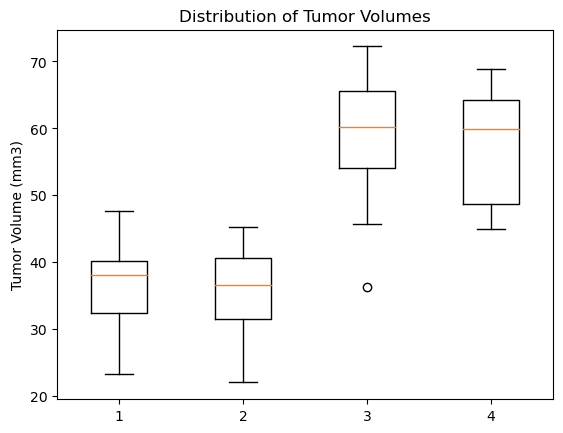

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# (Generate from the list)

fig1, ax1 = plt.subplots()
ax1.set_title("Distribution of Tumor Volumes")
ax1.set_ylabel("Tumor Volume (mm3)")
plt.boxplot(tumor_vol_data)

plt.show()

## Line and Scatter Plots

In [21]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"] 


capomulin



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [22]:
capomulin_mouse = capomulin.loc[capomulin["Mouse ID"] == "b128"]
capomulin_mouse


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


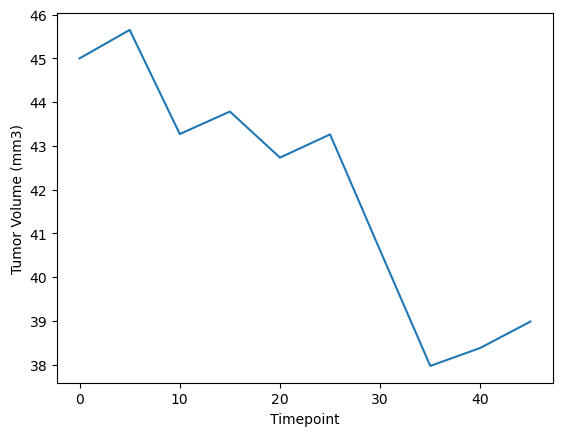

In [23]:
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])


# plt.title("Capomulin for b128")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")



plt.show()

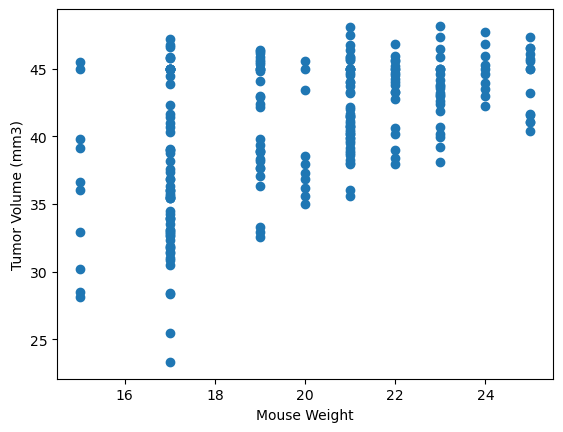

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin["Weight (g)"],capomulin["Tumor Volume (mm3)"])


plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")


plt.show()

## Correlation and Regression

The r-squared is: 0.27636002234559187


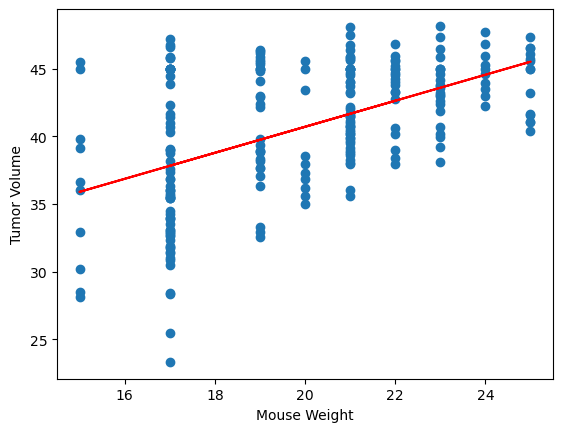

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


x_values = capomulin["Weight (g)"]
y_values = capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.annotate(line_eq,(0,50),fontsize=15,color="red")
# plt.annotate(f'Correlation: {correlation:.2f}', xy=(25, 50), xycoords='axes fraction', fontsize=12)

plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume")

print(f"The r-squared is: {rvalue**2}")

plt.show()

In [26]:
correlation = st.pearsonr(x_values, y_values)

print(f"The correlation between both the mouse weight and tumor volume is {round(correlation[0],2)}")

The correlation between both the mouse weight and tumor volume is 0.53
